<a href="https://colab.research.google.com/github/AbstractMonkey/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_Explanatory_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make Explanatory Visualizations

### Objectives

- identify misleading visualizations and how to fix them
- use Seaborn to visualize distributions and relationships with continuous and discrete variables
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

# Avoid Misleading Visualizations

Did you find/discuss any interesting misleading visualizations in your Walkie Talkie?

## What makes a visualization misleading?

[5 Ways Writers Use Misleading Graphs To Manipulate You](https://venngage.com/blog/misleading-graphs/)

## Two y-axes

<img src="https://kieranhealy.org/files/misc/two-y-by-four-sm.jpg" width="800">
 
 Other Examples: 
 - [Spurious Correlations](https://tylervigen.com/spurious-correlations)
 - <https://blog.datawrapper.de/dualaxis/>
 - <https://kieranhealy.org/blog/archives/2016/01/16/two-y-axes/>
 - <http://www.storytellingwithdata.com/blog/2016/2/1/be-gone-dual-y-axis>

##  Y-axis doesn't start at zero.

<img src="https://i.pinimg.com/originals/22/53/a9/2253a944f54bb61f1983bc076ff33cdd.jpg" width="600">

## Pie Charts are bad

<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2009/11/Fox-News-pie-chart.png?fit=620%2C465&ssl=1" width="600">

## Pie charts that omit data are extra bad
 
- A guy makes a misleading chart that goes viral

 What does this chart imply at first glance? You don't want your user to have to do a lot of work in order to be able to interpret you graph correctly. You want that first-glance conclusions to be the correct ones.

 <img src="https://pbs.twimg.com/media/DiaiTLHWsAYAEEX?format=jpg&name=medium" width='600'>
 
 <https://twitter.com/michaelbatnick/status/1019680856837849090?lang=en>
 
- It gets picked up by overworked journalists (assuming incompetency before malice)
 
 <https://www.marketwatch.com/story/this-1-chart-puts-mega-techs-trillions-of-market-value-into-eye-popping-perspective-2018-07-18>
 
- Even after the chart's implications have been refuted, it's hard a bad (although compelling) visualization from being passed around.

 <https://www.linkedin.com/pulse/good-bad-pie-charts-karthik-shashidhar/>

**["yea I understand a pie chart was probably not the best choice to present this data."](https://twitter.com/michaelbatnick/status/1037036440494985216)**

## Pie Charts that compare unrelated things are next-level extra bad

<img src="http://www.painting-with-numbers.com/download/document/186/170403+Legalizing+Marijuana+Graph.jpg" width="600">


## Be careful about how you use volume to represent quantities:

radius vs diameter vs volume

<img src="https://static1.squarespace.com/static/5bfc8dbab40b9d7dd9054f41/t/5c32d86e0ebbe80a25873249/1546836082961/5474039-25383714-thumbnail.jpg?format=1500w" width="600">

## Don't cherrypick timelines or specific subsets of your data:

<img src="https://wattsupwiththat.com/wp-content/uploads/2019/02/Figure-1-1.png" width="600">

Look how specifically the writer has selected what years to show in the legend on the right side.

<https://wattsupwiththat.com/2019/02/24/strong-arctic-sea-ice-growth-this-year/>

Try the tool that was used to make the graphic for yourself

<http://nsidc.org/arcticseaicenews/charctic-interactive-sea-ice-graph/>
                                                                                           

## Use Relative units rather than Absolute Units

<img src="https://imgs.xkcd.com/comics/heatmap_2x.png" width="600">

## Avoid 3D graphs unless having the extra dimension is effective

Usually you can Split 3D graphs into multiple 2D graphs

3D graphs that are interactive can be very cool. (See Plotly and Bokeh)

<img src="https://thumbor.forbes.com/thumbor/1280x868/https%3A%2F%2Fblogs-images.forbes.com%2Fthumbnails%2Fblog_1855%2Fpt_1855_811_o.jpg%3Ft%3D1339592470" width="600">

## Don't go against typical conventions

<img src="http://www.callingbullshit.org/twittercards/tools_misleading_axes.png" width="600">

# Tips for choosing an appropriate visualization:

## Use Appropriate "Visual Vocabulary"

[Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)

## What are the properties of your data?
- Is your primary variable of interest continuous or discrete?
- Is in wide or long (tidy) format?
- Does your visualization involve multiple variables?
- How many dimensions do you need to include on your plot?

Can you express the main idea of your visualization in a single sentence?

How hard does your visualization make the user work in order to draw the intended conclusion?

## Which Visualization tool is most appropriate? 

[Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)

## Simple Web Scraper with IMDb

In [1]:
from requests import get

url = 'https://www.imdb.com/title/tt6105098/ratings?ref_=tt_ov_rt'
response = get(url)
print(response.text[:500])











<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///title/tt6105098?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
     


In [2]:
from bs4 import BeautifulSoup

html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [3]:
vote_container = html_soup.find_all('div', class_ ='leftAligned')
vote_container[1:11]

[<div class="leftAligned">11,685</div>,
 <div class="leftAligned">7,753</div>,
 <div class="leftAligned">14,593</div>,
 <div class="leftAligned">15,820</div>,
 <div class="leftAligned">8,442</div>,
 <div class="leftAligned">3,890</div>,
 <div class="leftAligned">1,767</div>,
 <div class="leftAligned">1,167</div>,
 <div class="leftAligned">857</div>,
 <div class="leftAligned">2,860</div>]

In [4]:
votes = [containers.text for containers in vote_container][1:11]
votes

['11,685',
 '7,753',
 '14,593',
 '15,820',
 '8,442',
 '3,890',
 '1,767',
 '1,167',
 '857',
 '2,860']

In [5]:
urls = ['https://www.imdb.com/title/tt6105098/ratings?ref_=tt_ov_rt',     # Lion King (2019)
        'https://www.imdb.com/title/tt0110357/ratings?ref_=tt_ov_rt',     # Lion King (1994)
        'https://www.imdb.com/title/tt6139732/ratings?ref_=tt_ov_rt',     # Aladdin (2019)
        'https://www.imdb.com/title/tt0103639/ratings?ref_=tt_ov_rt']     # Aladdin (1992) w/ Robin Williams


votes_list = []
for url in urls:
    # Get raw HTML response
    response = get(url)
    
    # Convert to BS Object
    html_soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find vote containers and extract star ratings
    vote_containers = html_soup.find_all('div', class_ = 'leftAligned')
    votes = [containers.text for containers in vote_containers][1:11]
        
    # Append to initial list
    votes_list.append(votes)
    
print(votes_list)

[['11,685', '7,753', '14,593', '15,820', '8,442', '3,890', '1,767', '1,167', '857', '2,860'], ['255,309', '219,684', '213,892', '100,854', '33,145', '13,267', '5,346', '3,013', '1,971', '4,967'], ['14,949', '11,927', '23,015', '20,628', '8,766', '3,414', '1,537', '932', '674', '2,425'], ['58,973', '61,293', '111,234', '61,607', '20,600', '7,063', '2,592', '1,200', '689', '1,251']]


In [6]:
import pandas as pd

movies = ['The Lion King (2019)', 'The Lion King (1994)', 'Aladdin (2019)', 'Aladdin (1992)']

df = pd.DataFrame(votes_list)
df = df.T
df.columns = movies
df = df.apply(lambda x: x.str.replace(',',''))
df['Star Rating'] = range(1,11)[::-1]
df

,The Lion King (2019),The Lion King (1994),Aladdin (2019),Aladdin (1992),Star Rating
0,11685,255309,14949,58973,10
1,7753,219684,11927,61293,9
2,14593,213892,23015,111234,8
3,15820,100854,20628,61607,7
4,8442,33145,8766,20600,6
5,3890,13267,3414,7063,5
6,1767,5346,1537,2592,4
7,1167,3013,932,1200,3
8,857,1971,674,689,2
9,2860,4967,2425,1251,1


In [7]:
# Convert df into tidy-format
df_tidy = df.melt(id_vars='Star Rating')
df_tidy = df_tidy.rename(columns={'variable': 'Movie', 'value': 'Number of Votes'})
df_tidy['Number of Votes'] = pd.to_numeric(df_tidy['Number of Votes'])
df_tidy

,Star Rating,Movie,Number of Votes
0,10,The Lion King (2019),11685
1,9,The Lion King (2019),7753
2,8,The Lion King (2019),14593
3,7,The Lion King (2019),15820
4,6,The Lion King (2019),8442
5,5,The Lion King (2019),3890
6,4,The Lion King (2019),1767
7,3,The Lion King (2019),1167
8,2,The Lion King (2019),857
9,1,The Lion King (2019),2860


In [8]:
df_tidy['Vote Percent'] = df_tidy.groupby('Movie')['Number of Votes'].apply(lambda x: x / x.sum() * 100)
df_tidy.head()

,Star Rating,Movie,Number of Votes,Vote Percent
0,10,The Lion King (2019),11685,16.975623
1,9,The Lion King (2019),7753,11.263329
2,8,The Lion King (2019),14593,21.200279
3,7,The Lion King (2019),15820,22.982828
4,6,The Lion King (2019),8442,12.264288


In [9]:
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
Star Rating        40 non-null int64
Movie              40 non-null object
Number of Votes    40 non-null int64
Vote Percent       40 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.3+ KB


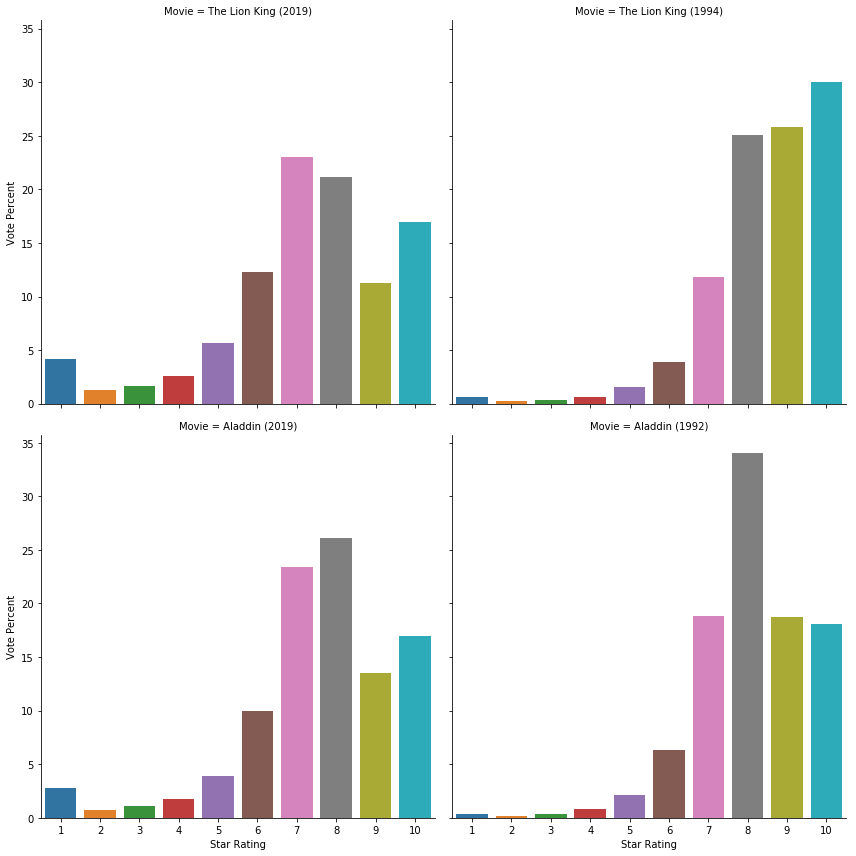

In [10]:
import seaborn as sns

sns.catplot(x='Star Rating', y='Vote Percent', col='Movie', col_wrap=2, height=6, kind='bar', data=df_tidy);

# Making Explanatory Visualizations with Seaborn

Today we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)



In [11]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

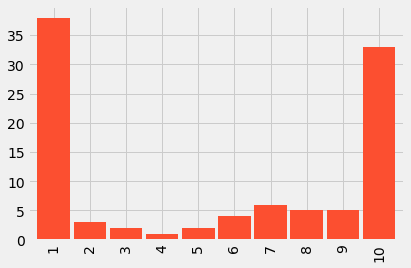

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

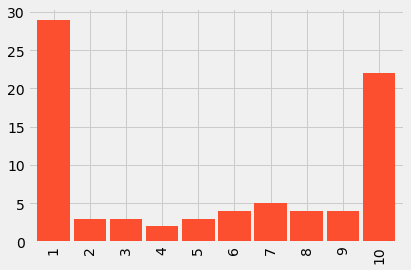

In [13]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

In [14]:
display(example)

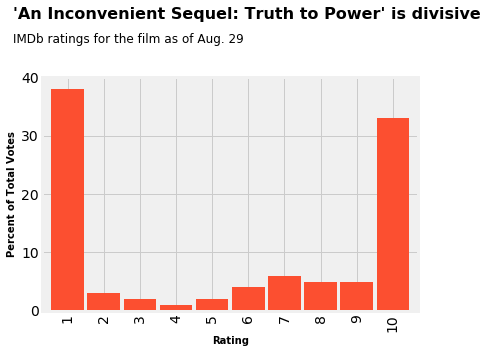

In [15]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(facecolor='white')

fake.plot.bar(color='C1', width=0.9)
plt.text(x=-1.5, y=50, fontsize=16, fontweight='bold',
         s = "'An Inconvenient Sequel: Truth to Power' is divisive")
plt.text(x=-1.5, y=46, fontsize=12,
         s = "IMDb ratings for the film as of Aug. 29")
plt.yticks([0, 10, 20, 30, 40])
plt.xlabel('Rating', fontsize=10, fontweight='bold')
plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold');

## Reproduce with real data

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
print(df.shape)
df.head()

(80053, 27)


,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [17]:
df.category.value_counts()

Top 1000 voters       4216
Aged 18-29            4216
IMDb staff            4216
Males under 18        4216
Females               4216
US users              4216
Males Aged 18-29      4216
Aged 30-44            4216
IMDb users            4216
Aged under 18         4216
Females Aged 30-44    4216
Aged 45+              4216
Females Aged 18-29    4216
Males                 4216
Females Aged 45+      4216
Males Aged 30-44      4216
Non-US users          4216
Males Aged 45+        4216
Females under 18      4165
Name: category, dtype: int64

In [18]:
df.dtypes

timestamp       object
respondents      int64
category        object
link            object
average        float64
mean           float64
median           int64
1_votes          int64
2_votes          int64
3_votes          int64
4_votes          int64
5_votes          int64
6_votes          int64
7_votes          int64
8_votes          int64
9_votes          int64
10_votes         int64
1_pct          float64
2_pct          float64
3_pct          float64
4_pct          float64
5_pct          float64
6_pct          float64
7_pct          float64
8_pct          float64
9_pct          float64
10_pct         float64
dtype: object

In [19]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [20]:
df_imdb = df[df.category == 'IMDb users']
df_imdb.shape

(4216, 27)

In [21]:
final = df_imdb.tail(1)
final

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [22]:
#columns = ['{}_pct'.format(i) for i in range(1,11)]
columns = [f'{i}_pct' for i in range(1,11)]
columns

['1_pct',
 '2_pct',
 '3_pct',
 '4_pct',
 '5_pct',
 '6_pct',
 '7_pct',
 '8_pct',
 '9_pct',
 '10_pct']

In [23]:
data = final[columns]
data = data.T
data.index = range(1,11)
data

,80052
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


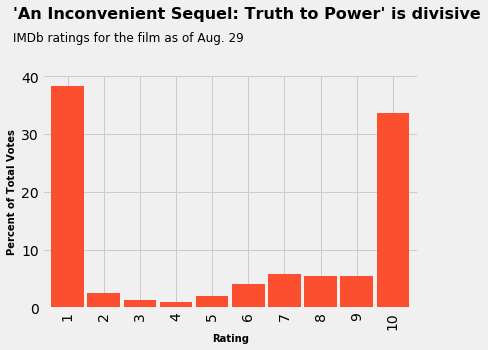

In [24]:
plt.style.use('fivethirtyeight')

data.plot.bar(color='C1', width=0.9, legend=False)
plt.text(x=-1.5, y=50, fontsize=16, fontweight='bold',
         s = "'An Inconvenient Sequel: Truth to Power' is divisive")
plt.text(x=-1.5, y=46, fontsize=12,
         s = "IMDb ratings for the film as of Aug. 29")
plt.yticks([0, 10, 20, 30, 40])
plt.xlabel('Rating', fontsize=10, fontweight='bold')
plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold');

## Quick Introduction to Altair Plotting Package

In [25]:
import altair as alt
from vega_datasets import data

source = data.cars()
source.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


In [26]:
brush = alt.selection(type='interval', resolve='global')

base = alt.Chart(source).mark_point().encode(
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.ColorValue('gray')),
    tooltip=['Name','Origin','Weight_in_lbs'],
).add_selection(
    brush
).properties(
    width=350,
    height=350
)

base.encode(x='Horsepower') | base.encode(x='Acceleration') | base.encode(x='Weight_in_lbs')

HConcatChart({
  data:      Acceleration  Cylinders  Displacement  ...  Origin  Weight_in_lbs       Year
  0            12.0          8         307.0  ...     USA           3504 1970-01-01
  1            11.5          8         350.0  ...     USA           3693 1970-01-01
  2            11.0          8         318.0  ...     USA           3436 1970-01-01
  3            12.0          8         304.0  ...     USA           3433 1970-01-01
  4            10.5          8         302.0  ...     USA           3449 1970-01-01
  5            10.0          8         429.0  ...     USA           4341 1970-01-01
  6             9.0          8         454.0  ...     USA           4354 1970-01-01
  7             8.5          8         440.0  ...     USA           4312 1970-01-01
  8            10.0          8         455.0  ...     USA           4425 1970-01-01
  9             8.5          8         390.0  ...     USA           3850 1970-01-01
  10           17.5          4         133.0  ...  Europe           3090 1970-01-01
  11           11.5          8         350.0  ...     USA           4142 1970-01-01
  12           11.0          8         351.0  ...     USA           4034 1970-01-01
  13           10.5          8         383.0  ...     USA           4166 1970-01-01
  14           11.0          8         360.0  ...     USA           3850 1970-01-01
  15           10.0          8         383.0  ...     USA           3563 1970-01-01
  16            8.0          8         340.0  ...     USA           3609 1970-01-01
  17            8.0          8         302.0  ...     USA           3353 1970-01-01
  18            9.5          8         400.0  ...     USA           3761 1970-01-01
  19           10.0          8         455.0  ...     USA           3086 1970-01-01
  20           15.0          4         113.0  ...   Japan           2372 1970-01-01
  21           15.5          6         198.0  ...     USA           2833 1970-01-01
  22           15.5          6         199.0  ...     USA           2774 1970-01-01
  23           16.0          6         200.0  ...     USA           2587 1970-01-01
  24           14.5          4          97.0  ...   Japan           2130 1970-01-01
  25           20.5          4          97.0  ...  Europe           1835 1970-01-01
  26           17.5          4         110.0  ...  Europe           2672 1970-01-01
  27           14.5          4         107.0  ...  Europe           2430 1970-01-01
  28           17.5          4         104.0  ...  Europe           2375 1970-01-01
  29           12.5          4         121.0  ...  Europe           2234 1970-01-01
  ..            ...        ...           ...  ...     ...            ...        ...
  376          18.6          4         112.0  ...     USA           2640 1982-01-01
  377          18.0          4         112.0  ...     USA           2395 1982-01-01
  378          16.2          4         112.0  ...     USA           2575 1982-01-01
  379          16.0          4         135.0  ...     USA           2525 1982-01-01
  380          18.0          4         151.0  ...     USA           2735 1982-01-01
  381          16.4          4         140.0  ...     USA           2865 1982-01-01
  382          20.5          4         151.0  ...     USA           3035 1982-01-01
  383          15.3          4         105.0  ...  Europe           1980 1982-01-01
  384          18.2          4          91.0  ...   Japan           2025 1982-01-01
  385          17.6          4          91.0  ...   Japan           1970 1982-01-01
  386          14.7          4         105.0  ...     USA           2125 1982-01-01
  387          17.3          4          98.0  ...     USA           2125 1982-01-01
  388          14.5          4         120.0  ...   Japan           2160 1982-01-01
  389          14.5          4         107.0  ...   Japan           2205 1982-01-01
  390          16.9          4         108.0  ...   Japan           2245 1982-01-01
  391          15.0          4 

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!







In [0]:
candy = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv')

In [28]:
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [40]:
candy['winpercent'].nlargest(86).head()

52    84.180290
51    81.866257
79    81.642914
28    76.768600
64    76.673782
Name: winpercent, dtype: float64

In [30]:
candy = candy.sort_values(by='winpercent', ascending=False)
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782


In [31]:
candy['competitorname'] = candy['competitorname'].str.replace("Õ","'")
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782


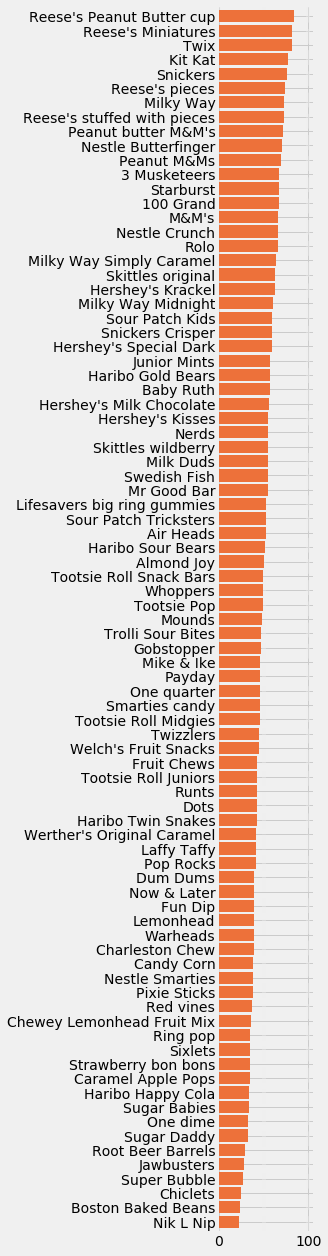

In [39]:
x = candy['competitorname']
x_pos = [i for i, _ in enumerate(x)]
ax = candy['winpercent'].nlargest(86).plot(kind='barh', figsize=(1.5, 21), color='#ED713A', zorder=2, width=0.85)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)

vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

plt.yticks(x_pos, x)
ax.invert_yaxis()

In [57]:
candy.corr()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,1.000000,-0.741721,0.249875,0.377824,0.254892,0.341210,-0.344177,0.597421,-0.339675,0.104169,0.504675,0.636517
fruity,-0.741721,1.000000,-0.335485,-0.399280,-0.269367,-0.269367,0.390678,-0.515066,0.299725,-0.034393,-0.430969,-0.380938
caramel,0.249875,-0.335485,1.000000,0.059356,0.328493,0.213113,-0.122355,0.333960,-0.269585,0.221933,0.254327,0.213416
peanutyalmondy,0.377824,-0.399280,0.059356,1.000000,0.213113,-0.017646,-0.205557,0.260420,-0.206109,0.087889,0.309153,0.406192
nougat,0.254892,-0.269367,0.328493,0.213113,1.000000,-0.089744,-0.138675,0.522976,-0.310339,0.123081,0.153196,0.199375
crispedricewafer,0.341210,-0.269367,0.213113,-0.017646,-0.089744,1.000000,-0.138675,0.423751,-0.224693,0.069950,0.328265,0.324680
hard,-0.344177,0.390678,-0.122355,-0.205557,-0.138675,-0.138675,1.000000,-0.265165,0.014532,0.091810,-0.244365,-0.310382
bar,0.597421,-0.515066,0.333960,0.260420,0.522976,0.423751,-0.265165,1.000000,-0.593409,0.099985,0.518407,0.429929
pluribus,-0.339675,0.299725,-0.269585,-0.206109,-0.310339,-0.224693,0.014532,-0.593409,1.000000,0.045523,-0.220794,-0.247448
sugarpercent,0.104169,-0.034393,0.221933,0.087889,0.123081,0.069950,0.091810,0.099985,0.045523,1.000000,0.329706,0.229151


#### Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

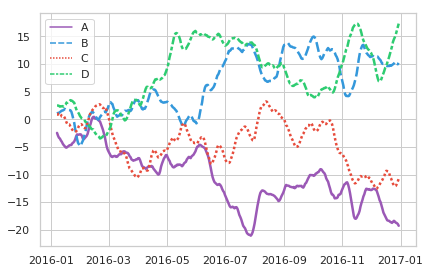

In [56]:
import seaborn as sns
sns.set(context='notebook',style='whitegrid',palette='deep',font='sans-serif',font_scale=1,color_codes=True, rc=None)

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A","B","C","D"])
data = data.rolling(7).mean()

# Palettes: pastel, muted, colorblind, tab10, dark, deep, bright, or a custom
flatui = ["#9b59b6", "#3498db", "#e74c3c", "#2ecc71"]
sns.lineplot(data=data, palette=sns.color_palette(flatui), linewidth=2.5)